# Redes Neuronales artificiales

Tenemos 7 neuronas con diferentes pesos (definidos de manera aleatoria) con la siguiente configuracion

 - Tenemos dos neuronas que representaran la informacion de entrada 
 - cada una de las dos neuronas esta conectada con cuatro siguientes neuronas dispuestas en una siguiente capa
 - Finalmente, cada salida de las neuronas previas es conectada a una unica neurona dispuesta en una capa de salida

 La configuracion quedaria como se muestra a continuacion:

<center>
    <img src="https://www.pngitem.com/pimgs/m/531-5314899_artificial-neural-network-png-transparent-png.png" width="30%" alt="A simple neural network">
</center>


In [105]:
import numpy as np
from numpy.random import uniform as u

class NeuralNet:
    '''     Objeto NeuralNet para crear redes neuronales artificiales.

    En este ejemplo la capa de entrada siempre sera de dos neuronas y 
    la capa de salida siempre de una, con el de poder visualizar el funcionamiento 
    interno de la red neuronal como un mapeo
    '''

    def __init__ (self, n_layers = 1, n_neurons = 4):
        '''     Constructor de la clase.

        Inicializa pesos aleatorios en la red neuronal.

        Parametros:
        n_capas : int
            Numero de capas ocultas en la red. Por defecto, el valor es 1
        
        n_neuronas :int
            Numero de neuronas por capa en la red. Por defecto, el valor es 4
        '''

        # Definimos pesos y biases en la capa de entrada 
        self.w_in = u(low= -1, high = 1, size = (2, n_neurons))
        self.b_in = u(low= -1, high = 1, size = n_neurons)

        # Definimos pesos y biases en las capas ocultas 
        self.w_hidden = u(low= -3, high = 3, size = (n_layers, n_neurons, n_neurons)) # TODO: Revisar con [-3, 3]
        self.b_hidden = u(low= -1, high = 1, size = (n_layers, n_neurons))

        # Definimos pesos y biases en la capa de salida
        self.w_out = u(low= -1, high = 1, size = (n_neurons, 1))
        self.b_out = u(low= -1, high = 1, size = 1)


    @staticmethod
    def activate_layer(y_in, w, b):
        '''     Calcula el producto interno y aplica funcion de activacion por capa.

        Parametros:
        ----------
        y_in: ndarray
            El vector con datos de entrada
        
        w : ndarray
            El vector de pesos
        
        b : ndarray
            El vector de biases
        
        Retorna
        -------
        s : ndarray
            Un vector de activaion resultante
        '''

        z = np.dot(y_in, w) + b
        s = 1. / (1. + np.exp(-z))

        return s

# Propagacion de informacion
    def feedforward(self, y_in):
        '''     Calcula el producto interno y aplica funcion de activacion por capa

        Parametros:
        ----------
        y : ndarray 
            recibe los datos de entrada y le aplica la funcion de activacion 

        Retorna:
        -------
        output
            Valor resultante de todas las operaciones de las capas ocultas
        '''

        # Entrada
        y = self.activate_layer(y_in, self.w_in, self.b_in)

        # Capas ocultas
        for i in range(self.w_hidden.shape[0]):
            y = self.activate_layer(y, self.w_hidden[i], self.b_hidden[i])

        #Salida
        output = self.activate_layer(y, self.w_out, self.b_out)

        return output

# Visualizacion TODO: Colormap check
    def visualize(self, grid_size = 50, colormap = 'gnuplot', c_reverse = False):
        '''     Funcion para visualizar el mapeo de la red neuronal en un plano 2D

        Parametros:
        ----------
        grid_size : int
            El tamaño a utilizar para crear rejilla. Default es 50
        
        colormap: str
            El mapa de color a utilizar. Referencia en matplotlib
        c_reverse: bool
            Flag para especificar si se invierte el mapa de color. Default False 
        '''
    
        import matplotlib.pyplot as plt
        import matplotlib as plot
        plot.rcParams['figure.dpi'] = 300

        # Creamos una rejilla
        x = np.linspace(-0.5, 0.5, grid_size)
        y = np.linspace(-0.5, 0.5, grid_size)
        xx, yy = np.meshgrid(x, y)

        # Para todas las coordenadas (x, y) en la rejilla
        # se realiza una unica lista con los pares de puntos      

        x_flat = xx.flatten()
        y_flat = yy.flatten()
        y_in = zip(x_flat, y_flat)
        y_in = np.array(list(y_in))

        # Hacemos feedfordward con la red
        y_out = self.feedforward(y_in)

        # Redimensionamos a la rejilla
        y_out_2d = np.reshape(y_out, (grid_size, grid_size))

        if c_reverse:
            cmap = plt.cm.get_cmap(colormap)
            cmap = cmap.reversed()
        else:
            cmap = colormap
        
        # Graficamos los resultados de la red

        plt.figure(figsize = (10, 10))
        plt.axes([0, 0, 1, 1])
        plt.imshow(
            y_out_2d, 
            extent = [-0.5, 0.5, -0.5, 0.5],
            interpolation = 'nearest',
            cmap = cmap)
        plt.axis(False)
        plt.show()

Ahora creamos un vector de entrada con valores aleatorios, que utilizaremos para validar el funcionamiento de nuestra red neuronal

In [31]:
# Definimos valores de entrada
y_in = np.array([0.8, 0.2])

Creamos una instancia de nuestra clase, una red neuronal artificial con la configuracion previamente definida
(1 capa oculta de 4 neronas)

In [25]:
nn = NeuralNet()

In [26]:
nn.w_hidden

array([[[ 0.45789301, -0.56366899, -0.34785198, -0.41573233],
        [-0.64968231,  0.85624825, -0.67452999,  0.26609752],
        [-0.66249945,  0.09392303, -0.14210523, -0.43695431],
        [ 0.95807885,  0.94405114, -0.60923634, -0.46116885]]])

Realizamos el proceso feedforward de la red con el valor de entrada

In [28]:
nn.feedforward(y_in)

array([0.6620991])

### **DeepNN**

In [106]:
deep_nn = NeuralNet(n_layers = 20, n_neurons = 100)

In [71]:
deep_nn.feedforward(y_in)

array([0.99938826])

In [35]:
deep_nn.w_hidden

array([[[-0.11067959, -0.32843156, -0.14865628, ..., -0.91420688,
          0.09736718, -0.27308873],
        [ 0.51977967, -0.46032817,  0.29253017, ..., -0.79155443,
         -0.04799056, -0.14526011],
        [-0.0286615 , -0.82288941, -0.27521338, ..., -0.28177148,
         -0.76379067,  0.98349663],
        ...,
        [ 0.15201048,  0.01317847, -0.44086801, ...,  0.06439033,
          0.4762078 , -0.74215061],
        [-0.02997104,  0.29723761,  0.86400167, ...,  0.67337782,
          0.56588474, -0.57028651],
        [-0.30912992,  0.81011136, -0.5068977 , ..., -0.28315458,
          0.99121682, -0.48602571]],

       [[ 0.74696442, -0.29833366, -0.74620888, ..., -0.60531773,
          0.26261459, -0.78293178],
        [ 0.0415564 ,  0.06088517,  0.87731303, ...,  0.30862713,
         -0.74245276,  0.87753738],
        [ 0.36437728, -0.07594307, -0.65493382, ...,  0.50758319,
         -0.9895715 ,  0.19631973],
        ...,
        [ 0.41121487,  0.83751484, -0.59753337, ...,  

### **Visualizacion**

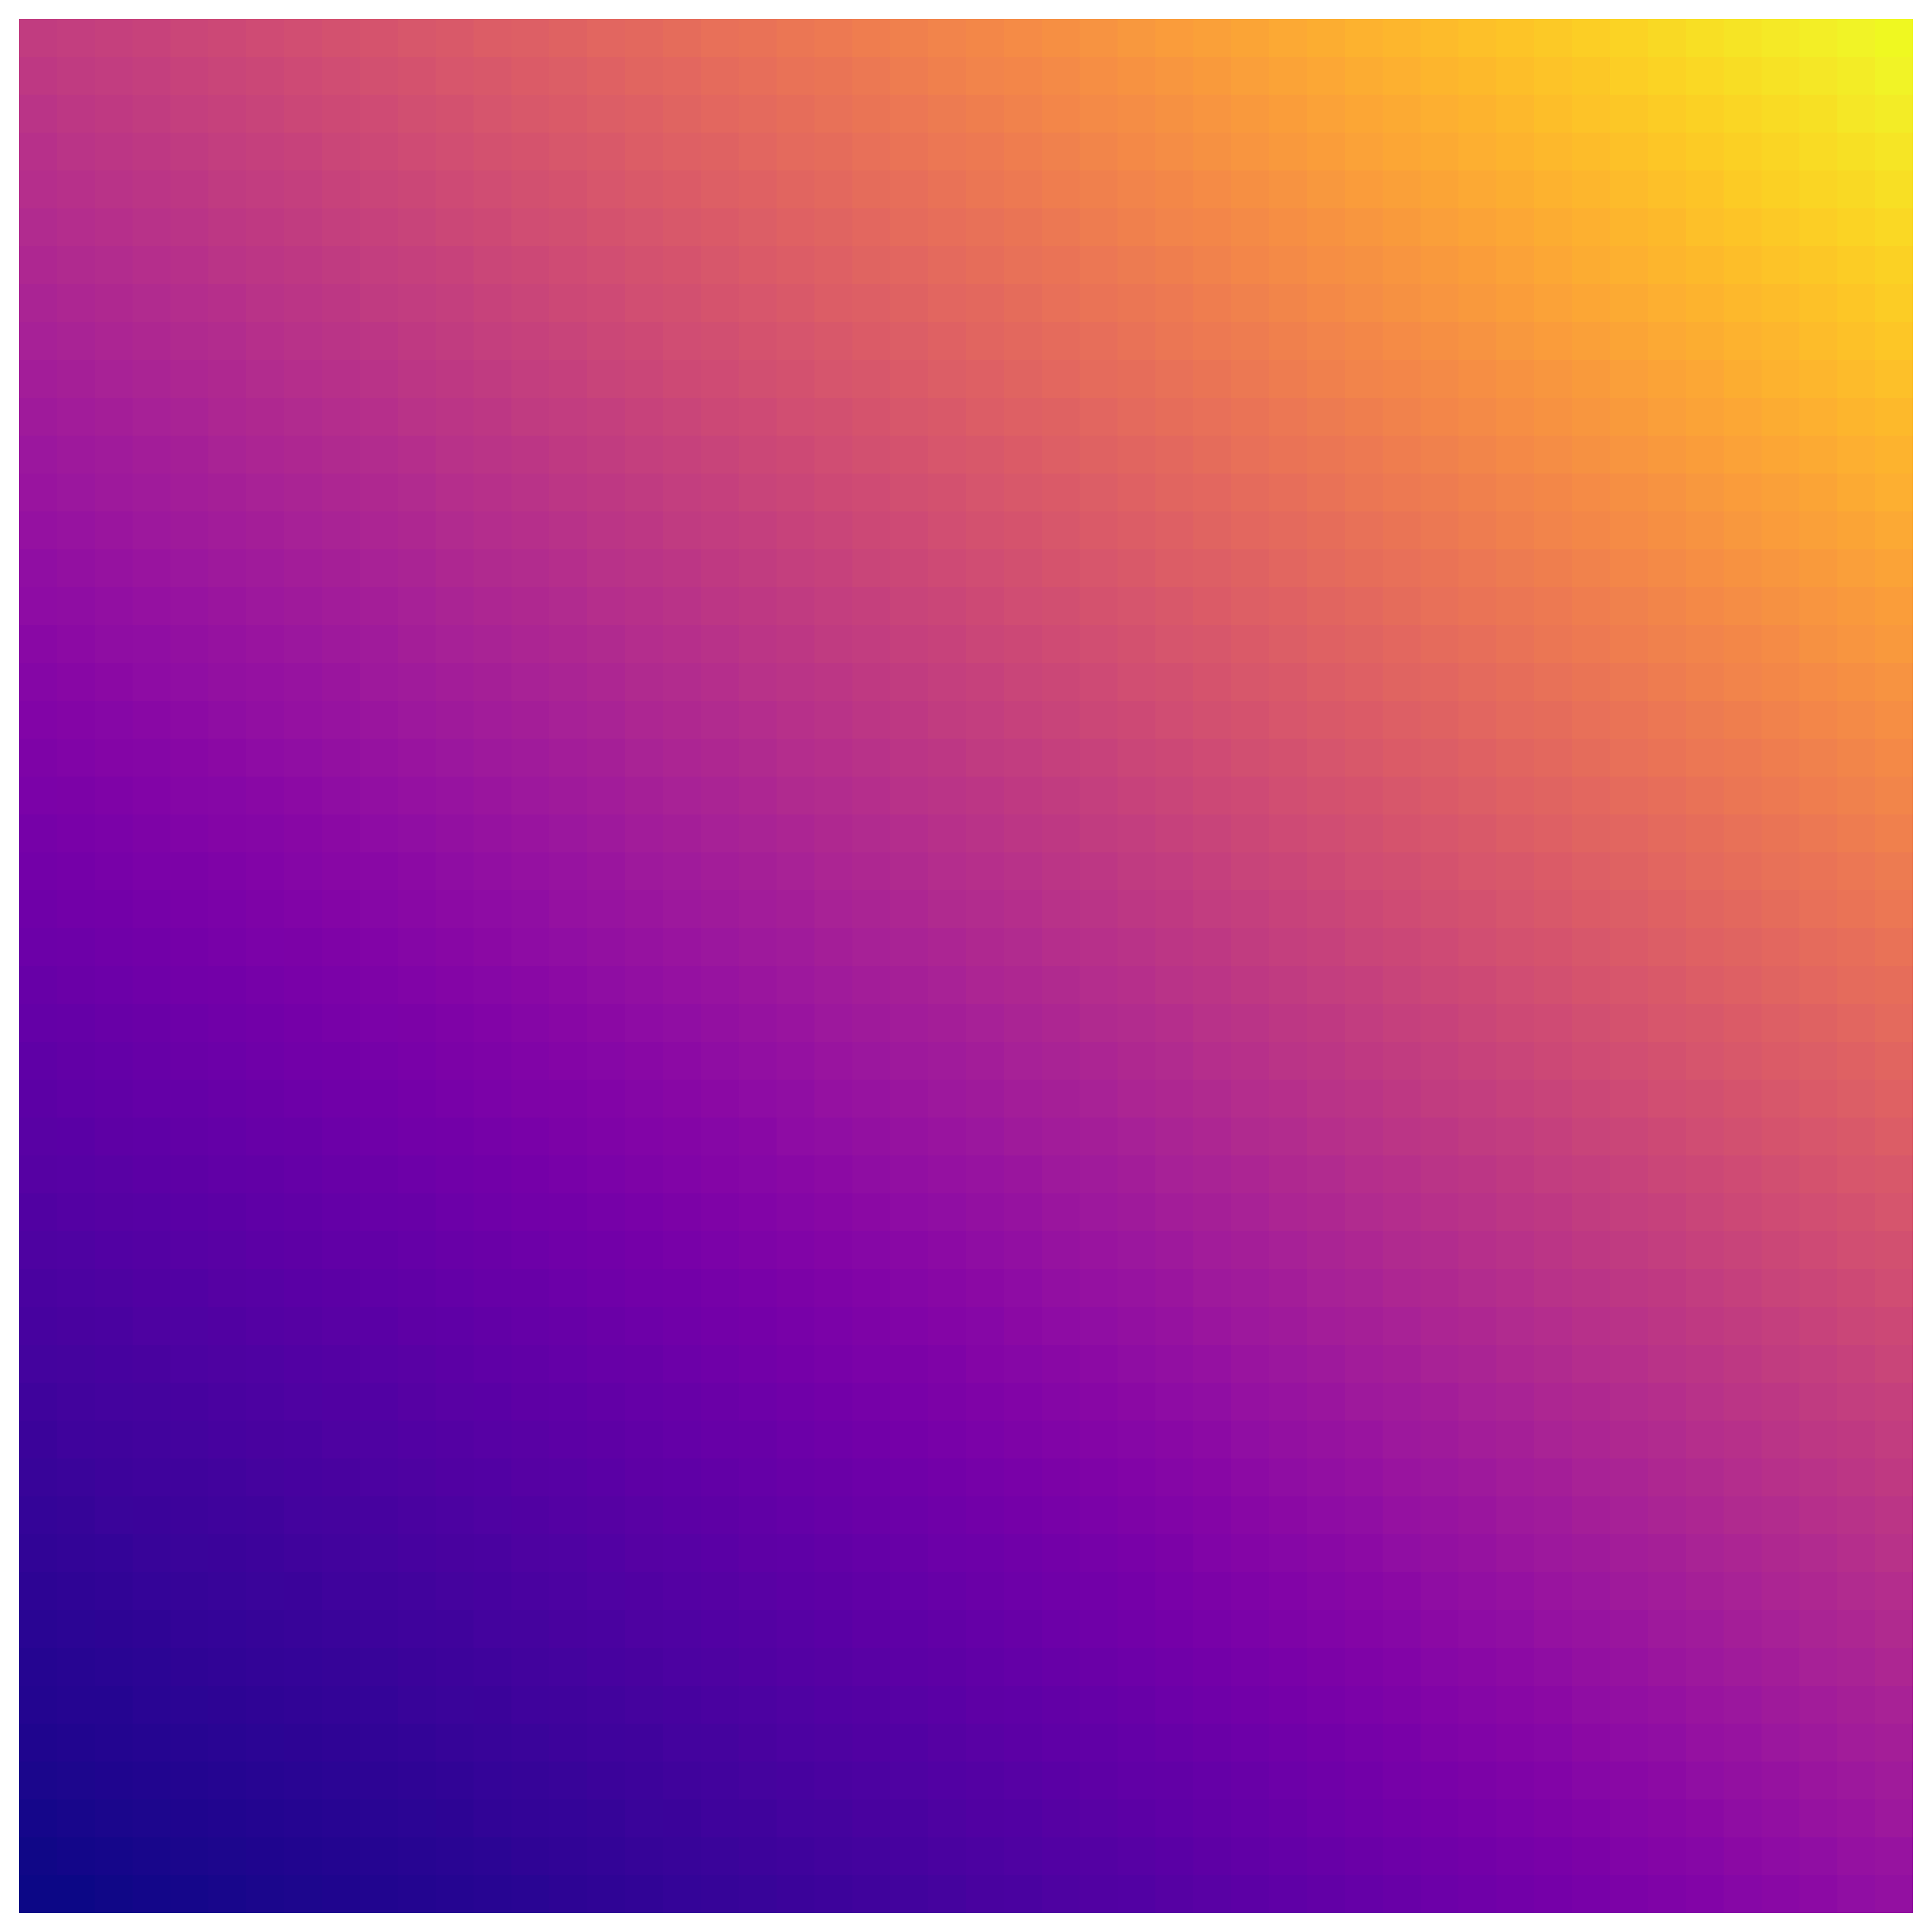

In [86]:
nn.visualize()

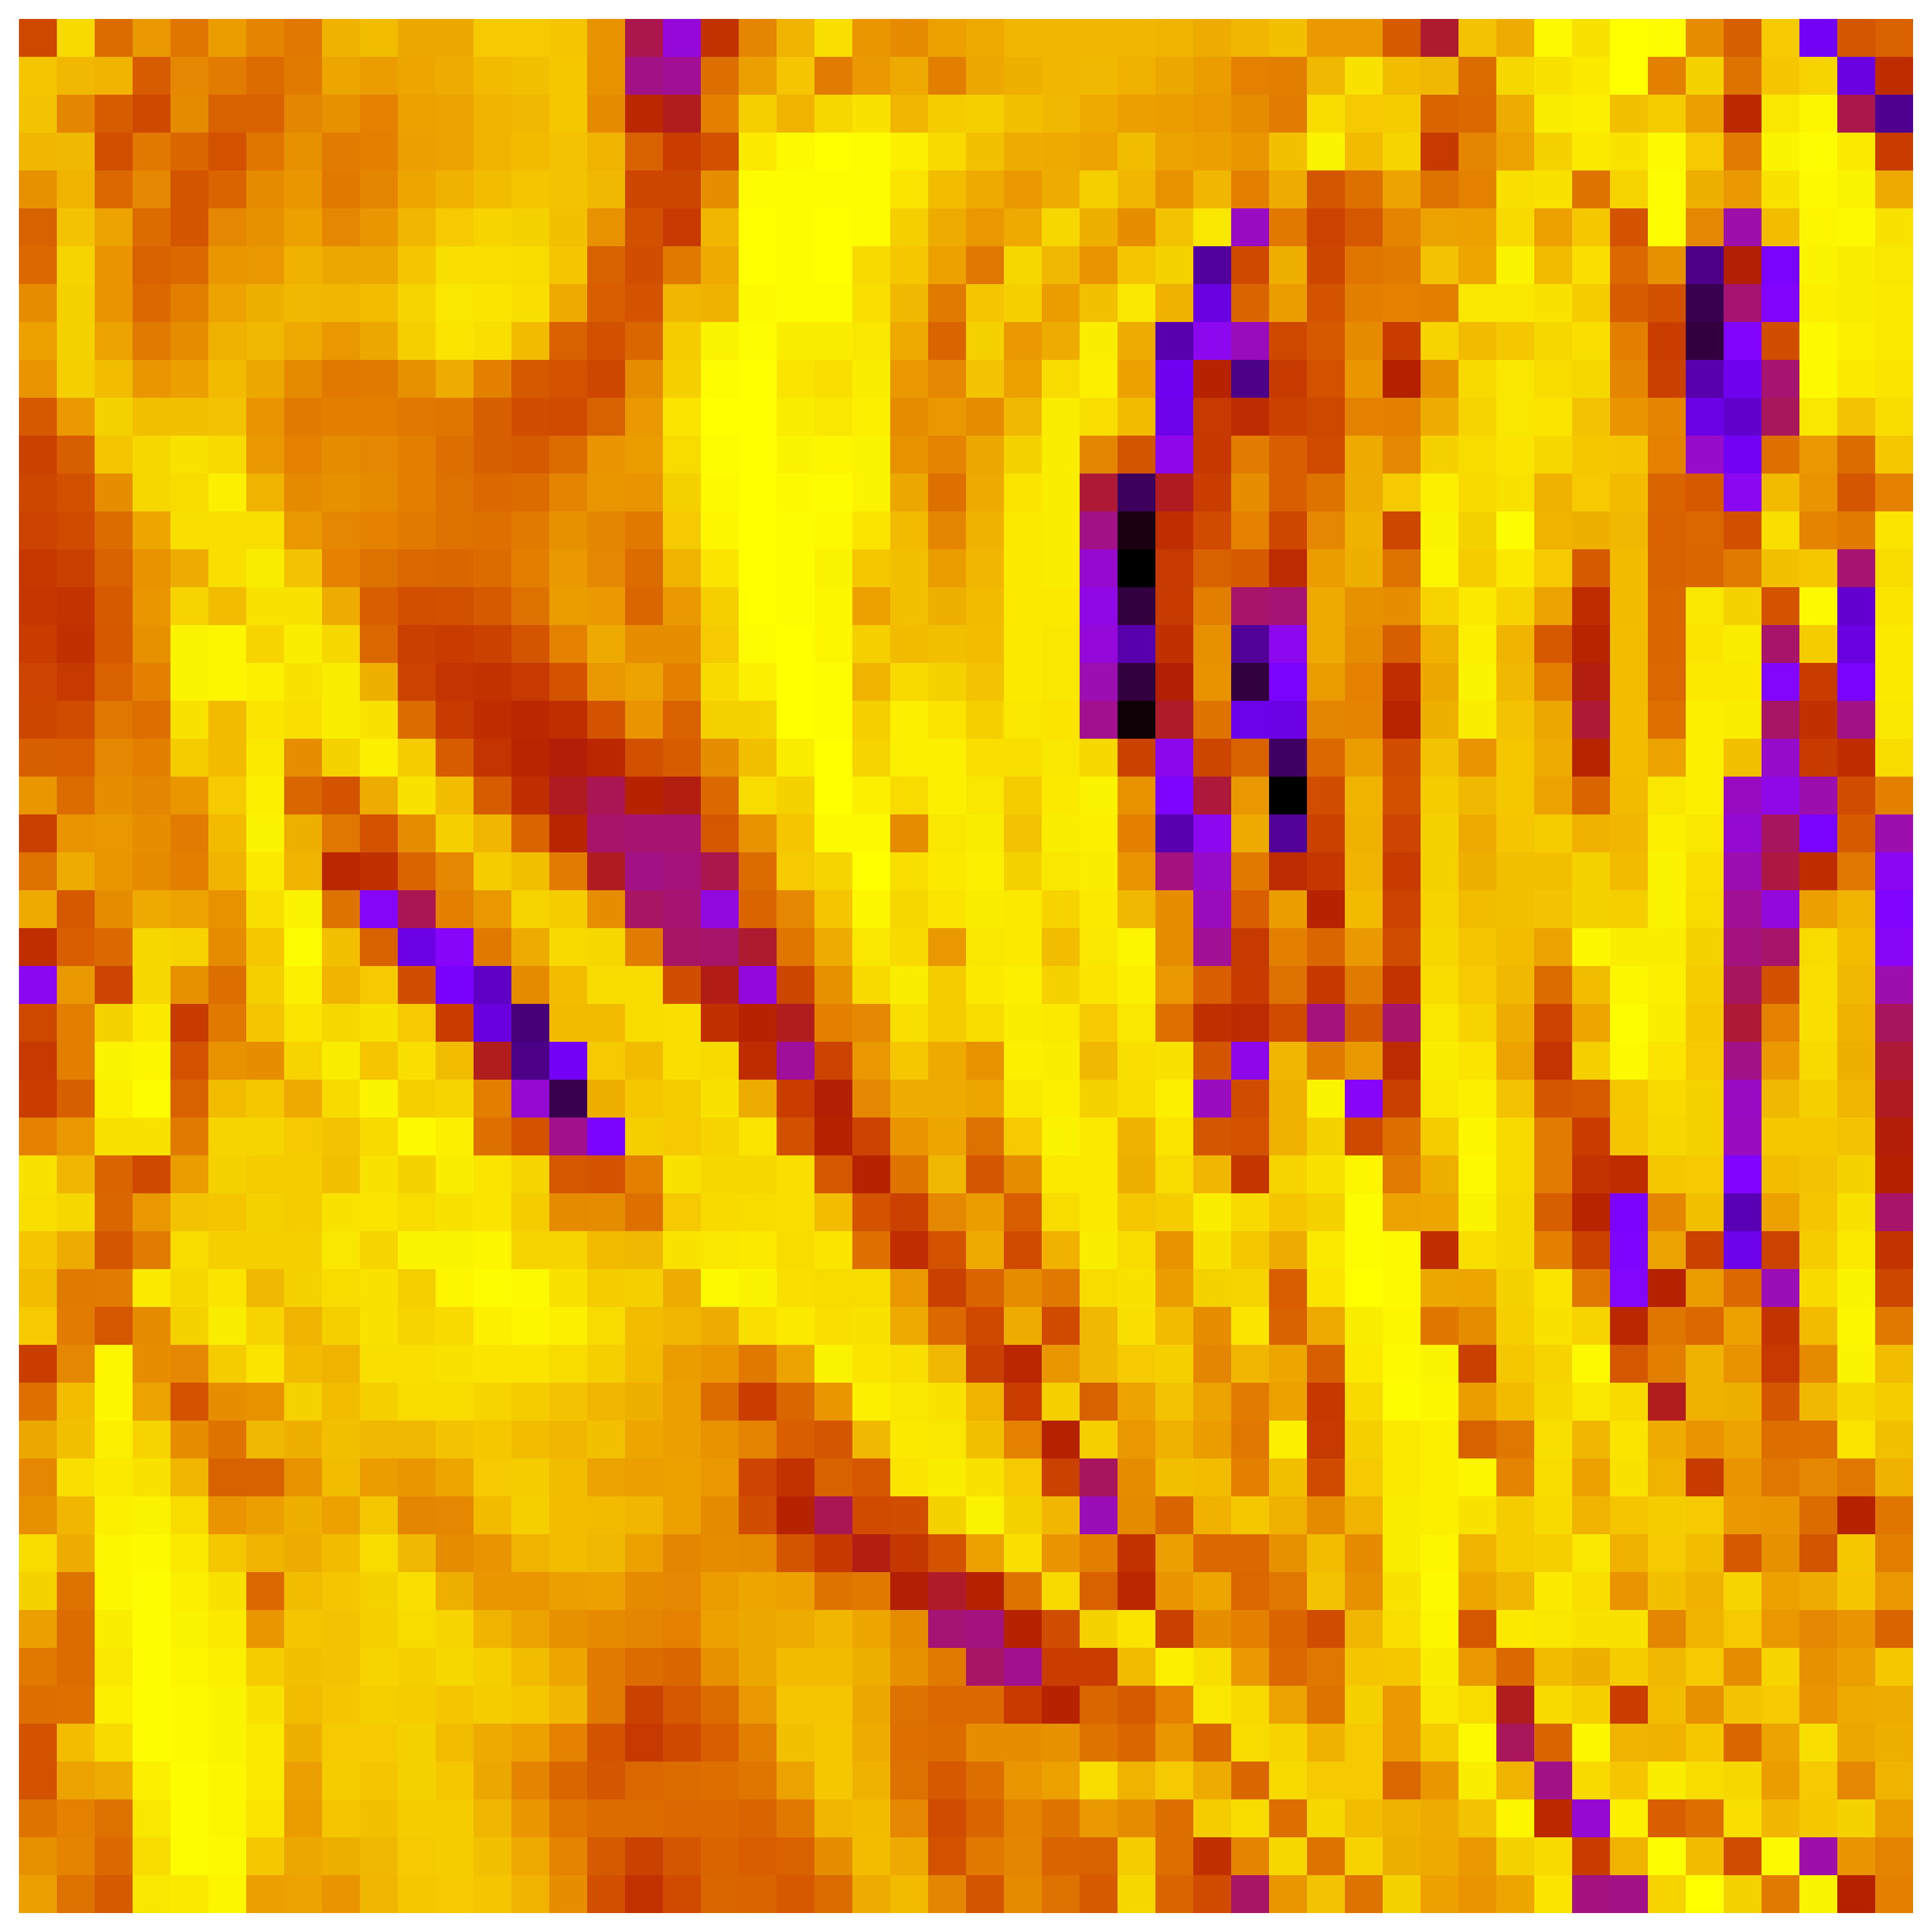

In [107]:
deep_nn.visualize()

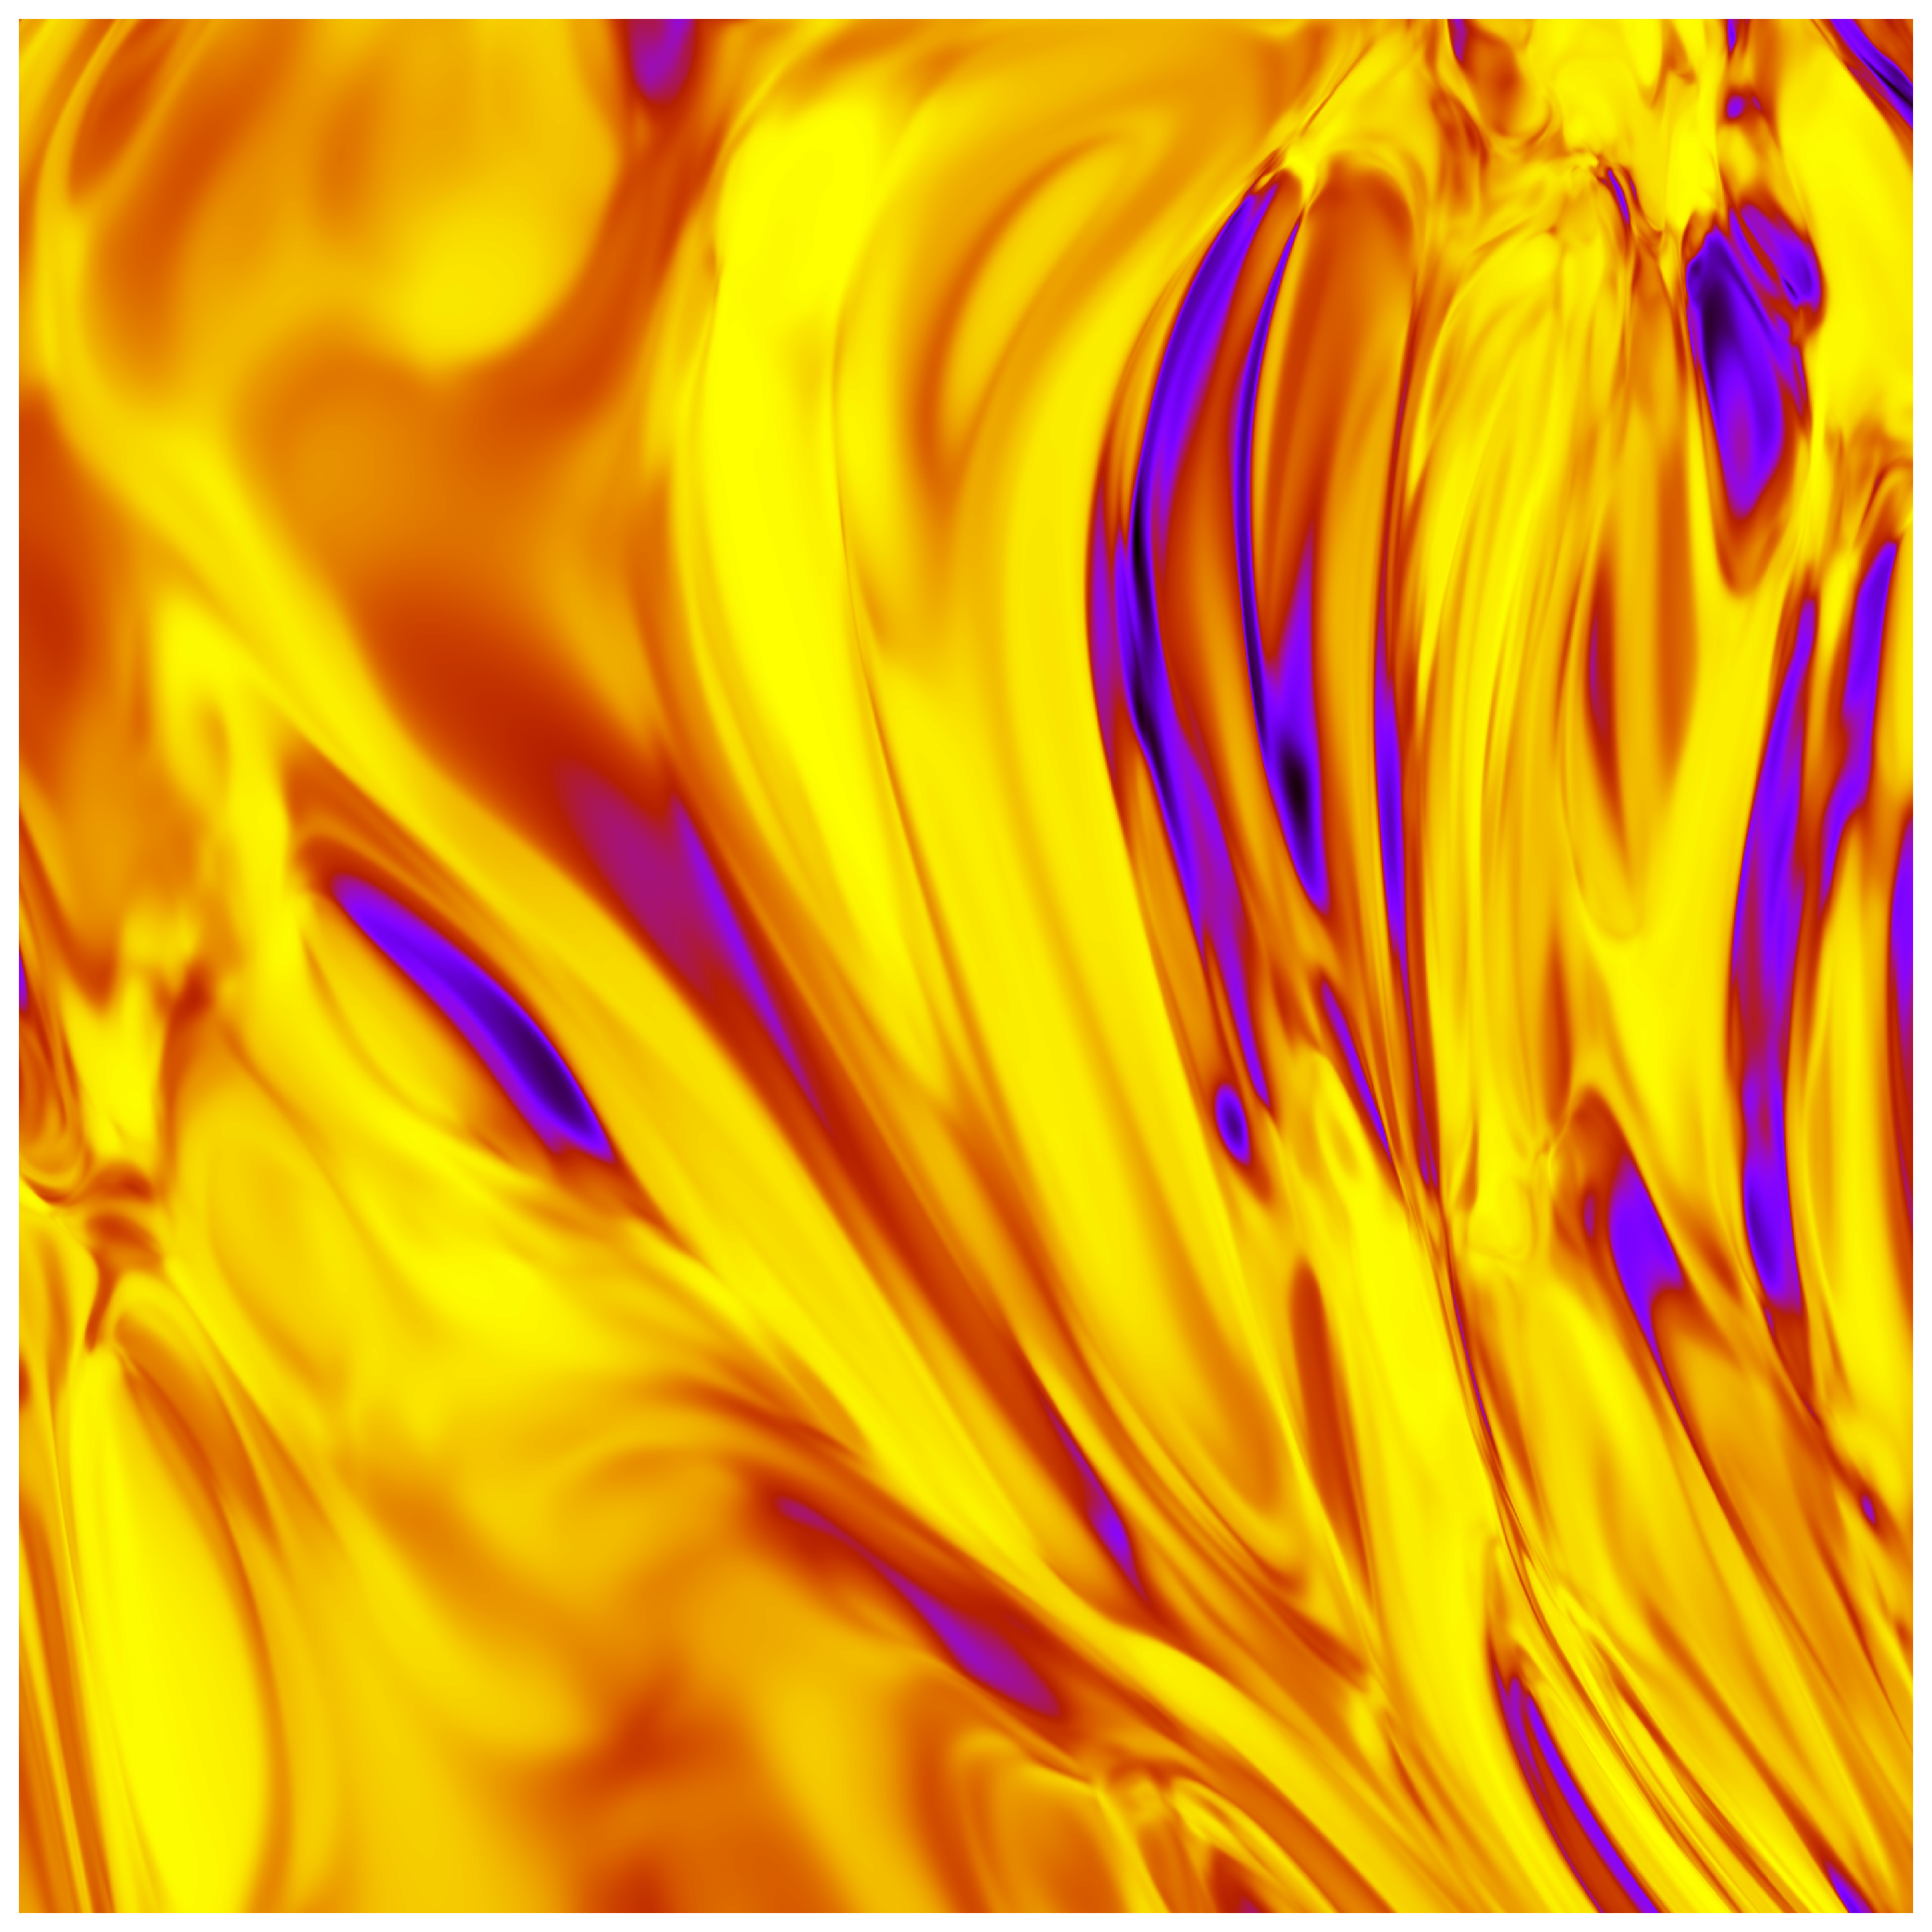

In [108]:
deep_nn.visualize(grid_size=2048) #n!